In [1]:
import numpy as np
random_seed = 40
np.random.seed(random_seed)
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
# from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


# tf.config.experimental.set_visible_devices([], 'GPU')


In [2]:
# !pip install pandas

# Load the data
dataframe = pd.read_csv("train_noemalised_all_index.csv")
# dataframe = pd.read_csv("")
dataframe = pd.DataFrame(dataframe)
dataframe = dataframe.drop(["Unnamed: 0"], axis=1)
# dataframe2 = dataframe[['sz_index', 'Weiner_index', 'Mo_index', 'demented_class']]
dataframe2 = dataframe.sample(frac=1, random_state=random_seed)

/Users/gnbhavithran/Python_github/brain_graph_final_only/venv-metal-brain/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


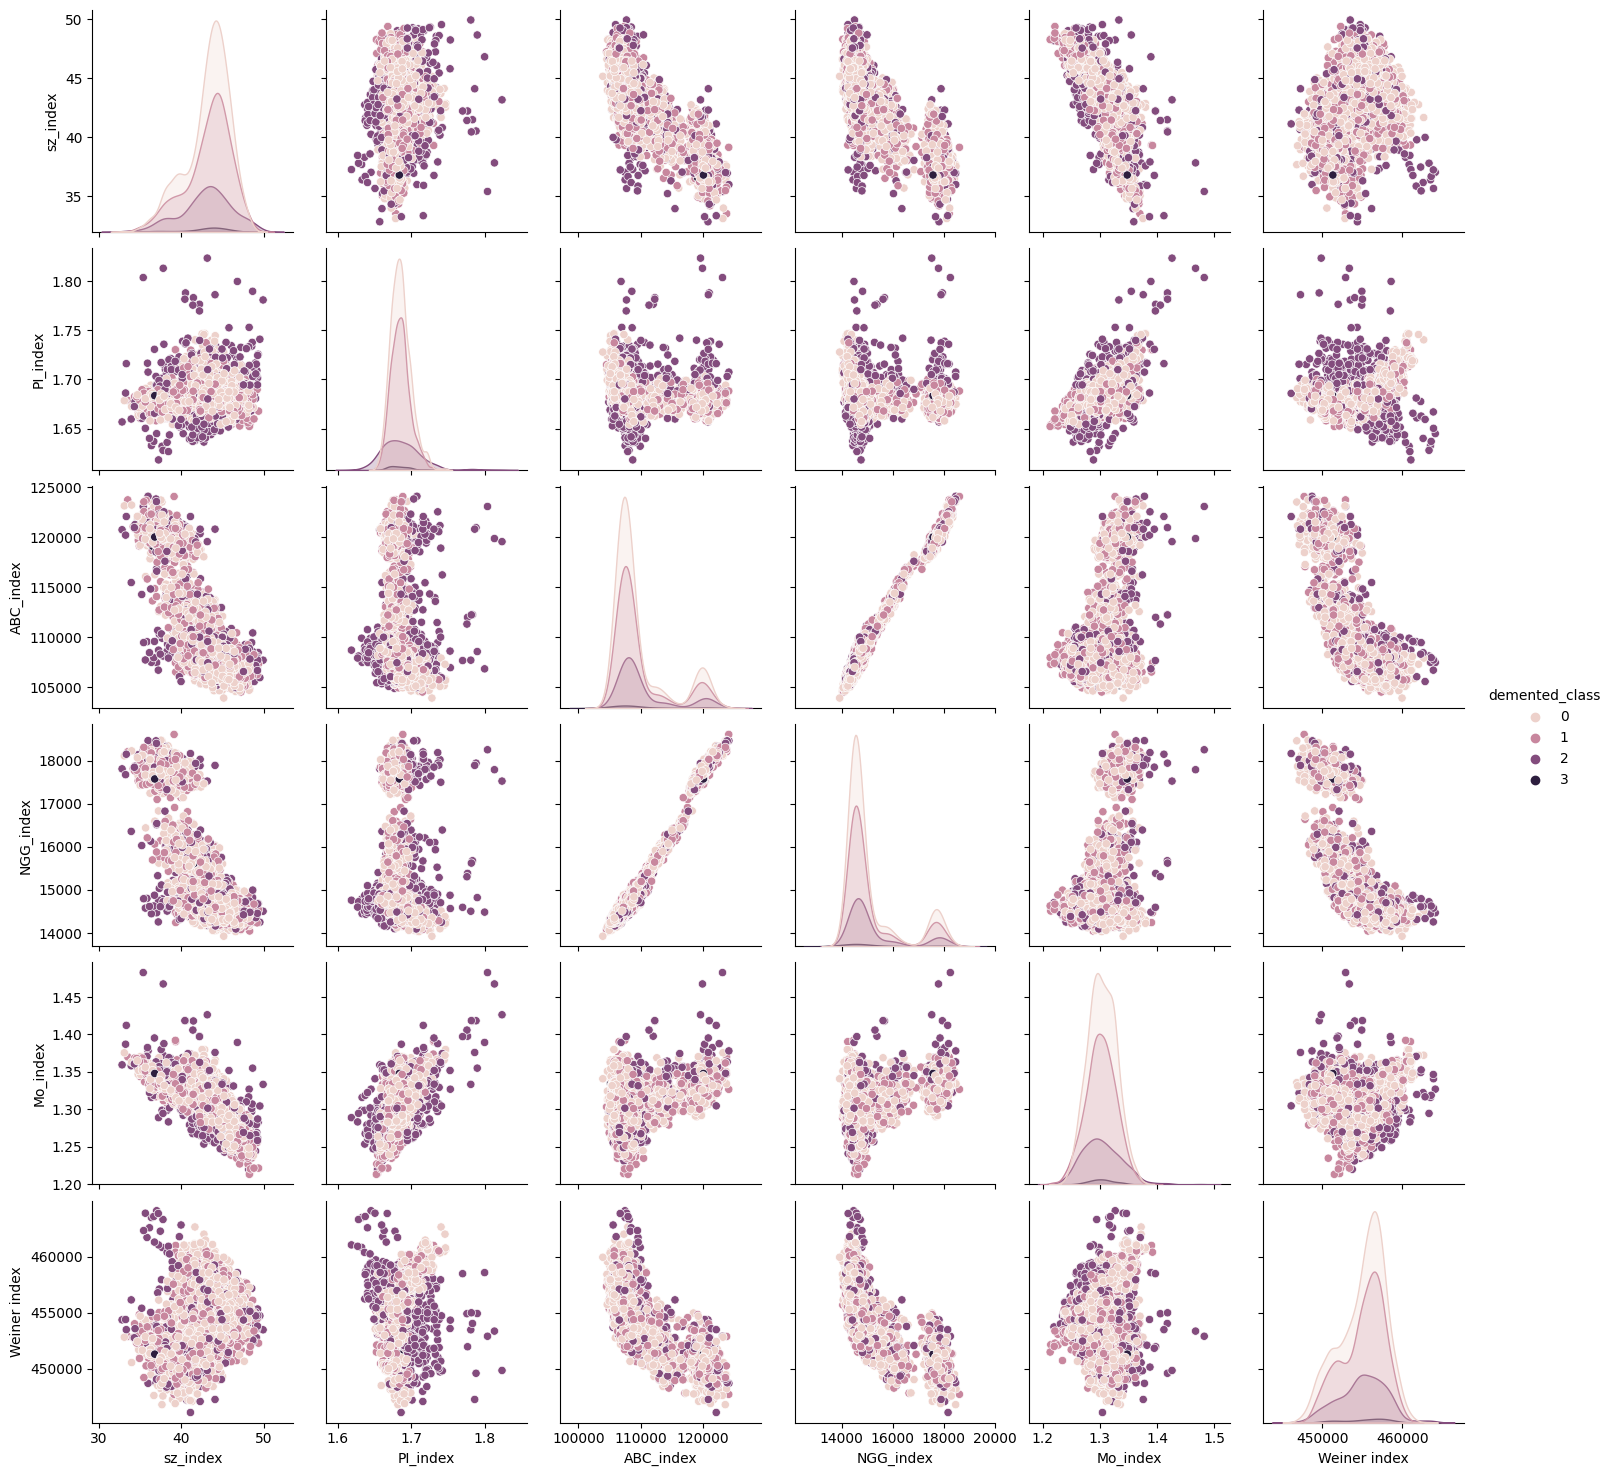

In [3]:
# Visualize the whole dataset
sns.pairplot(dataframe2, hue='demented_class')

In [3]:
X = dataframe2.drop(["demented_class"], axis=1)
X = X.values.astype('float32')
y = dataframe2["demented_class"]

In [4]:
X, y = SMOTE(random_state=random_seed).fit_resample(X, y)

In [5]:
y.value_counts()

demented_class
0    2560
1    2560
2    2560
3    2560
Name: count, dtype: int64

In [6]:
# Load your dataset and split it into features (X) and targets (y)
# X.shape should be (num_samples, 5) and y.shape should be (num_samples, 4)

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
X_scaled.shape

(10240, 6)

In [8]:
# from sklearn import MultiOutputRegressor

# Create an SVM with a polynomial kernel of a higher degree
# degree = 3  # You can increase this to increase the dimension
svm = SVC(**{'C': 1000, 'gamma': 1, 'kernel': 'rbf'})
# linear_regression_model = LogisticRegression()


from sklearn.model_selection import GridSearchCV
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline

# defining parameter range
# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']} 

# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# defining parameter range
# Define the hyperparameters grid
# param_grid_DT = {
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# Create a Decision Tree classifier/regressor
dt = DecisionTreeClassifier(**{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2})  # or DecisionTreeRegressor()

# Create a GridSearchCV object
# grid_search_DT = GridSearchCV(dt, param_grid_DT, cv=5, scoring='accuracy')  # Use an appropriate scoring metric

# Define the hyperparameters grid
# param_grid_lr = {
#     'fit_intercept': [True, False],
#     'n_jobs': [True, False]
# }

# Create a Linear Regression model
lr = LinearRegression(**{'fit_intercept': True, 'n_jobs': True})

# Create a GridSearchCV object
# grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='neg_mean_squared_error')  # Use an appropriate scoring metric

# Define the hyperparameters grid
# param_grid_log_r = {
#     'C': [0.001, 0.01, 0.1, 1, 10],
#     'penalty': ['l2']
# }

# Create a Logistic Regression model
log_reg = LogisticRegression(**{'C': 1, 'penalty': 'l2'})

# Create a GridSearchCV object
# grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_r, cv=5, scoring='accuracy')  # Use an appropriate scoring metric



# Define your other two ML models using TensorFlow, e.g., Dense neural networks
def create_neural_network():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation= "relu", input_shape=(6,)),
        tf.keras.layers.Dense(32, activation= "softmax"),
        tf.keras.layers.Dense(4, activation='linear')  # 4 outputs
    ])
    return model



nn_model1 = create_neural_network()
# nn_model2 = create_neural_network()

pca = decomposition.PCA()
std_slc = StandardScaler()
# dec_tree = DecisionTreeClassifier()

# pipe = Pipeline(steps=[('std_slc', std_slc),
#                            ('pca', pca),
#                            ('dec_tree', dec_tree)])
# logistic_model = LogisticRegression()


2023-10-02 19:35:38.397078: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-10-02 19:35:38.397103: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-10-02 19:35:38.397109: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-10-02 19:35:38.397170: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-02 19:35:38.397208: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True)

# Lists to store results for each fold
# svm_scores = []
# nn1_scores = []
# nn2_scores = []
# dt_scores = []
# linear_scores = []
# logistic_scores = []

In [10]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Example list of categorical labels
labels = ['cat', 'dog', 'fish', 'dog', 'cat']

# Step 1: Label Encoding
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)

# Step 2: One-Hot Encoding
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

# The one-hot encoded representation
print(onehot_encoded)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


/Users/gnbhavithran/Python_github/brain_graph_final_only/venv-metal-brain/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
# i_val = 0
# # k = [0] * num_folds
# # ans_val = [0] * num_folds
# label_encoder = LabelEncoder()
# # y_val_1 = tf.keras.utils.to_categorical(y_val, num_classes=4)
# integer_encoded = label_encoder.fit_transform(y)

# # Step 2: One-Hot Encoding
# onehot_encoder = OneHotEncoder(sparse=False)
# integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
# y_val_1 = onehot_encoder.fit_transform(integer_encoded)
# print(y_val_1.shape)
# Lists to store results for each fold
svm_scores = []
nn1_scores = []
nn2_scores = []
dt_scores = []
linear_scores = []
logistic_scores = []
for train_index, val_index in kf.split(X_scaled):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y[train_index], y[val_index]
    # Train and evaluate SVM
    svm.fit(X_train, y_train)
    # Make predictions on the test data
    predictions = svm.predict(X_val)

    # i_val += 1
    # k[i_val-1] = X_val
    # ans_val[i_val-1] = y_val

    # Calculate accuracy
    svm_score = accuracy_score(y_val, predictions)
    svm_scores.append(svm_score)
    
    # # Train and evaluate Neural Network 1
    nn_model1.compile(optimizer="Adam", loss="MSE")
    # y_val_1 = tf.keras.utils.to_categorical(y_val, num_classes=4)
    nn_model1.fit(X_train, y_train, epochs=50, verbose=0)

    
    
    nn1_score = nn_model1.predict(X_val, y_val, verbose=0)
    nn1_scores.append(nn1_score)
    
    # Train and evaluate Desicion Tree
    dt.fit(X_train, y_train)
    dt_score = dt.score(X_val, y_val)
    dt_scores.append(dt_score)

    # Train and evaluate logistic Regression
    # lr.fit(X_train, y_train)
    # linear_score = lr.score(X_val, y_val)
    # linear_scores.append(linear_score)
    
    # # Train and evaluate linear Regression
    log_reg.fit(X_train, y_train)
    log_score = log_reg.score(X_val, y_val)
    logistic_scores.append(log_score)

    # # Train and evaluate Decision Tree
    # dt.fit(X_train, y_train)
    # dt_score = dt.score(X_val, y_val)
    # dt_scores.append(dt_score)

    # # Train and evaluate Neural Network 2
    # nn_model2.compile(optimizer='adam', loss='mean_squared_error')
    # nn_model2.fit(X_train, y_train, epochs=50, verbose=0)
    # nn2_score = nn_model2.evaluate(X_val, y_val, verbose=0)
    # nn2_scores.append(nn2_score)
    


2023-10-02 19:36:23.193214: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

ValueError: x and y must have same first dimension, but have shapes (5,) and (0,)

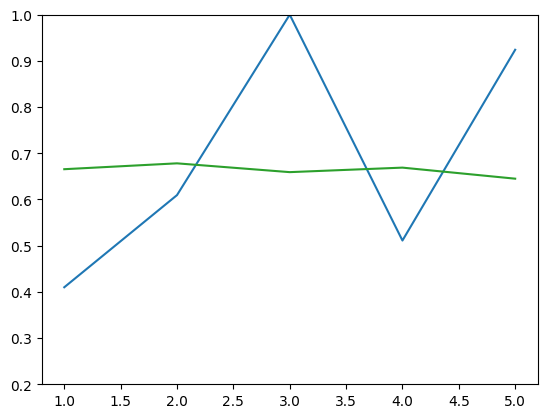

In [18]:
import matplotlib.pyplot as plt

fold_indices = range(1, num_folds + 1)
nn2_scores = np.array(nn1_scores)
nn1_scores = nn1_scores / np.max(nn1_scores) if np.max(nn1_scores) >=1 else nn1_scores
# plt.plot(fold_indices, svm_scores, label='SVM')
plt.plot(fold_indices, nn2_scores, label='Neural Network 1')
min_val = 0.2
plt.ylim((min_val * 100 // 10) / 10,  1)
plt.plot(fold_indices, dt_scores, label='DT score')
plt.plot(fold_indices, logistic_scores, label='logistic score')

plt.xlabel('Fold')
plt.ylabel('Validation Score')
plt.title('Validation Scores for Different Models')
plt.legend()
plt.show()


In [17]:
A = np.array([svm_scores, nn1_scores, dt_scores, linear_scores, logistic_scores])
# np.min(A)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.

In [ ]:
nn1_scores

[[1.228702425956726, 0.2529296875],
 [1.2321968078613281, 0.26171875],
 [1.2706325054168701, 0.2353515625],
 [1.2595609426498413, 0.25634765625],
 [1.2633343935012817, 0.23095703125]]

In [ ]:
svm_scores

[0.70458984375, 0.70654296875, 0.69921875, 0.705078125, 0.71826171875]

In [151]:
test_dataframe = pd.read_csv("test_noemalised_all_index.csv")
test_dataframe = pd.DataFrame(test_dataframe)
test_dataframe = test_dataframe.drop(["Unnamed: 0"], axis=1)
# dataframe2 = dataframe[['sz_index', 'Weiner_index', 'Mo_index', 'demented_class']]
test_dataframe2 = test_dataframe.sample(frac=1, random_state=random_seed)

In [152]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(test_dataframe2, test_size=0.9, random_state=random_seed)

X_test = test.drop(["demented_class"], axis=1)
X_test = X_test.values.astype('float32')
y_test = test["demented_class"]

In [153]:


prediciton_test_score_nn_model1 = nn_model1.evaluate(X_test, y_test, verbose=0)
prediciton_test_score_nn_model1

ValueError: in user code:

    File "/Users/gnbhavithran/Python_github/brain_graph_final_only/venv-metal-brain/lib/python3.9/site-packages/keras/src/engine/training.py", line 1972, in test_function  *
        return step_function(self, iterator)
    File "/Users/gnbhavithran/Python_github/brain_graph_final_only/venv-metal-brain/lib/python3.9/site-packages/keras/src/engine/training.py", line 1956, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/gnbhavithran/Python_github/brain_graph_final_only/venv-metal-brain/lib/python3.9/site-packages/keras/src/engine/training.py", line 1944, in run_step  **
        outputs = model.test_step(data)
    File "/Users/gnbhavithran/Python_github/brain_graph_final_only/venv-metal-brain/lib/python3.9/site-packages/keras/src/engine/training.py", line 1852, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/gnbhavithran/Python_github/brain_graph_final_only/venv-metal-brain/lib/python3.9/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "/Users/gnbhavithran/Python_github/brain_graph_final_only/venv-metal-brain/lib/python3.9/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/gnbhavithran/Python_github/brain_graph_final_only/venv-metal-brain/lib/python3.9/site-packages/keras/src/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/gnbhavithran/Python_github/brain_graph_final_only/venv-metal-brain/lib/python3.9/site-packages/keras/src/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/gnbhavithran/Python_github/brain_graph_final_only/venv-metal-brain/lib/python3.9/site-packages/keras/src/losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/gnbhavithran/Python_github/brain_graph_final_only/venv-metal-brain/lib/python3.9/site-packages/keras/src/backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32, 1) and (32, 4) are incompatible


In [126]:
prediction_test = svm.predict(X_test)

prediciton_test_score = accuracy_score(y_test, prediction_test)
prediciton_test_score

0.4965277777777778